In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nanin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
customers = pd.read_csv(r"C:\Users\nanin\OneDrive\Desktop\Customers (1).csv")
products = pd.read_csv(r"C:\Users\nanin\OneDrive\Desktop\Products.csv")
transactions = pd.read_csv(r"C:\Users\nanin\OneDrive\Desktop\Transactions.csv")

In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
python -m pip install --upgrade pip

SyntaxError: invalid syntax (629497118.py, line 1)

In [5]:
!python -m pip install --upgrade pip

     ---------------------------------------- 1.8/1.8 MB 1.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2


In [6]:
!pip install --disable-pip-version-check

ERROR: You must give at least one requirement to install (see "pip help install")


In [7]:
!which python
!which pip

'which' is not recognized as an internal or external command,
operable program or batch file.
'which' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
customers = pd.read_csv(r"C:\Users\nanin\OneDrive\Desktop\Customers (1).csv")
products = pd.read_csv(r"C:\Users\nanin\OneDrive\Desktop\Products.csv")
transactions = pd.read_csv(r"C:\Users\nanin\OneDrive\Desktop\Transactions.csv")

In [9]:
print("Customers Dataset:\n", customers.head())
print("\nProducts Dataset:\n", products.head())
print("\nTransactions Dataset:\n", transactions.head())

Customers Dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166

In [10]:
print("\nMissing values in Customers:\n", customers.isnull().sum())
print("\nMissing values in Products:\n", products.isnull().sum())
print("\nMissing values in Transactions:\n", transactions.isnull().sum())


Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [11]:
print("\nCustomers Dataset Statistics:\n", customers.describe(include='all'))
print("\nProducts Dataset Statistics:\n", products.describe(include='all'))
print("\nTransactions Dataset Statistics:\n", transactions.describe())


Customers Dataset Statistics:
        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Dataset Statistics:
        ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%         

In [12]:
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_data = pd.merge(merged_data, products, on='ProductID', how='left')

In [13]:
print("\nMerged Dataset:\n", merged_data.head())


Merged Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving

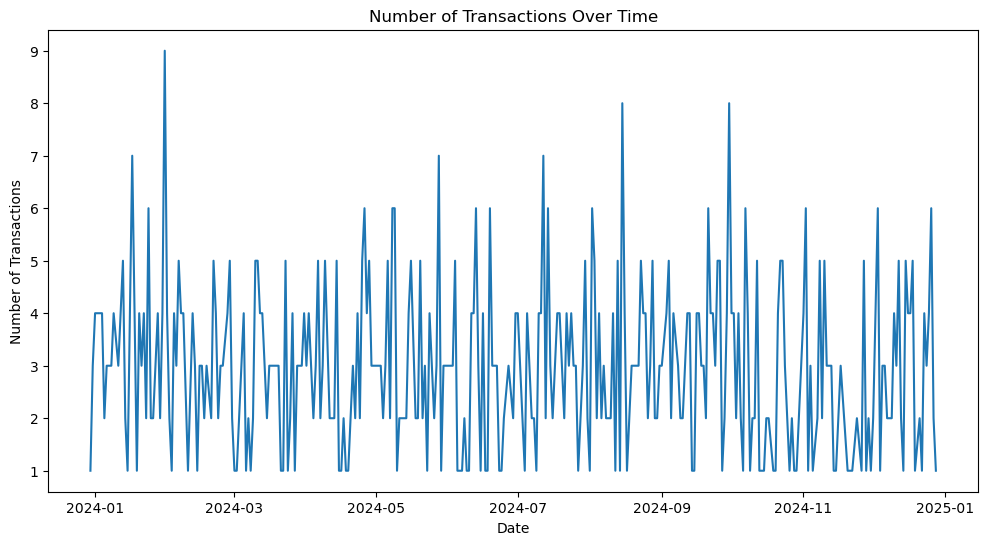

In [14]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
transactions_over_time = merged_data.groupby(merged_data['TransactionDate'].dt.date)['TransactionID'].count()
plt.figure(figsize=(12, 6))
transactions_over_time.plot(title='Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

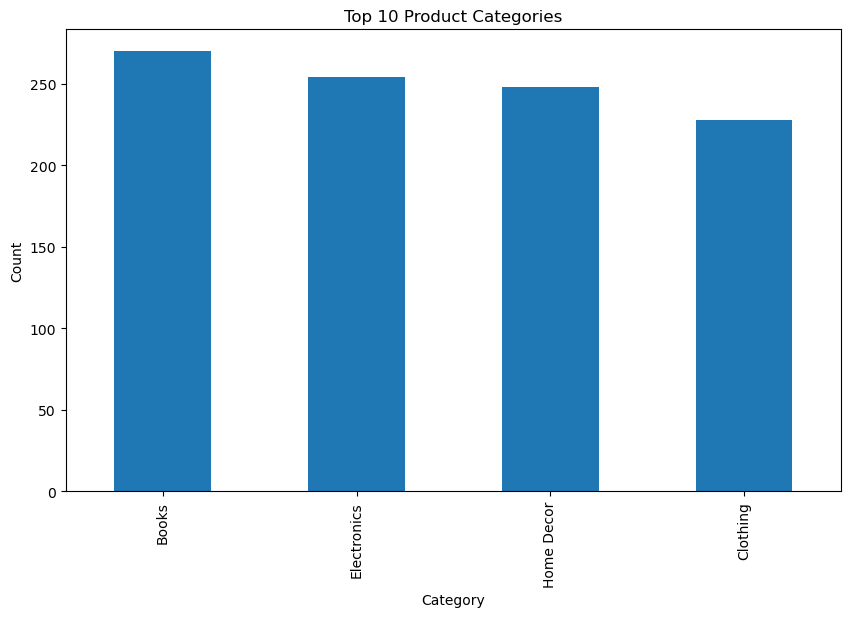

In [15]:
top_categories = merged_data['Category'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', title='Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

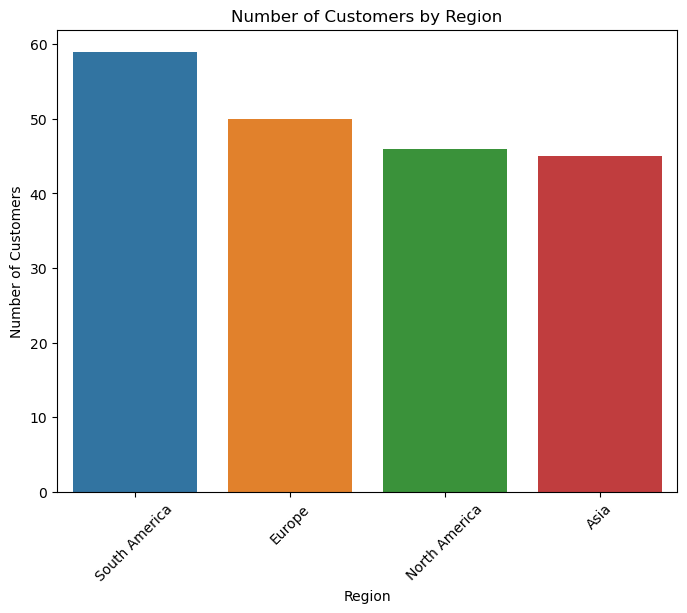

In [16]:
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [17]:
merged_data.to_csv("/mnt/data/MergedDataset.csv", index=False)

OSError: Cannot save file into a non-existent directory: '\mnt\data'

In [18]:
top_categories_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Product Categories by Total Sales:\n", top_categories_sales)


Top 5 Product Categories by Total Sales:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [19]:
region_distribution = customers['Region'].value_counts()
print("\nCustomer Distribution by Region:\n", region_distribution)


Customer Distribution by Region:
 South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


In [20]:
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Customers by Total Spending:\n", top_customers)


Top 5 Customers by Total Spending:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [21]:
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_transactions = merged_data.groupby('Month')['TransactionID'].count()
print("\nMonthly Transactions:\n", monthly_transactions)


Monthly Transactions:
 Month
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: TransactionID, dtype: int64


In [22]:
if 'Price' in merged_data.columns and 'Quantity' in merged_data.columns:
    merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
    top_categories_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).head(5)
    print("\nTop 5 Product Categories by Total Sales:\n", top_categories_sales)
    region_distribution = customers['Region'].value_counts()
    print("\nCustomer Distribution by Region:\n", region_distribution)
    top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
    print("\nTop 5 Customers by Total Spending:\n", top_customers)
    merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
    monthly_transactions = merged_data.groupby('Month')['TransactionID'].count()
    print("\nMonthly Transactions:\n", monthly_transactions)
    price_quantity_corr = merged_data[['Price', 'Quantity']].corr().iloc[0, 1]
    print("\nCorrelation between Product Price and Quantity Sold: {:.2f}".format(price_quantity_corr))

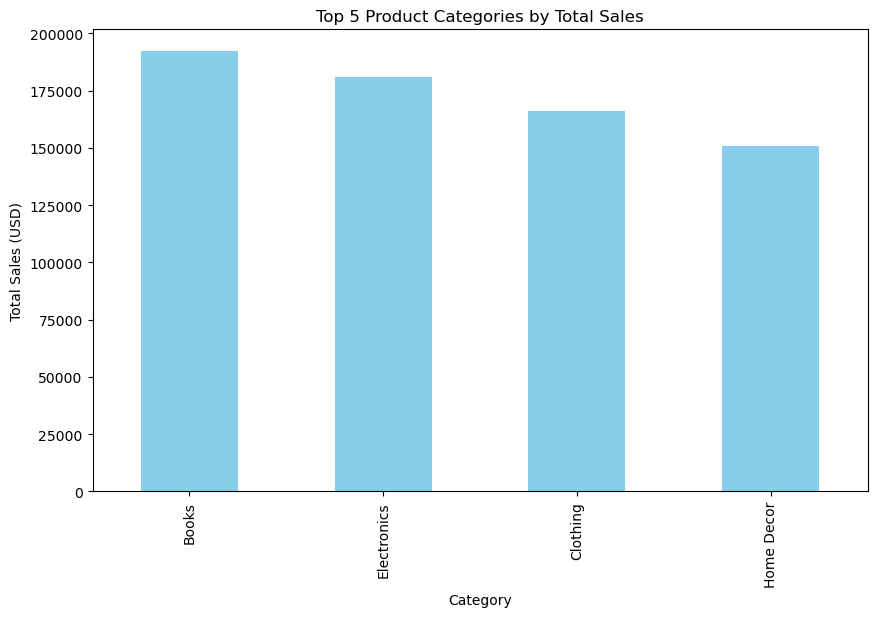

In [23]:
plt.figure(figsize=(10, 6))
top_categories_sales.plot(kind='bar', title='Top 5 Product Categories by Total Sales', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.show()

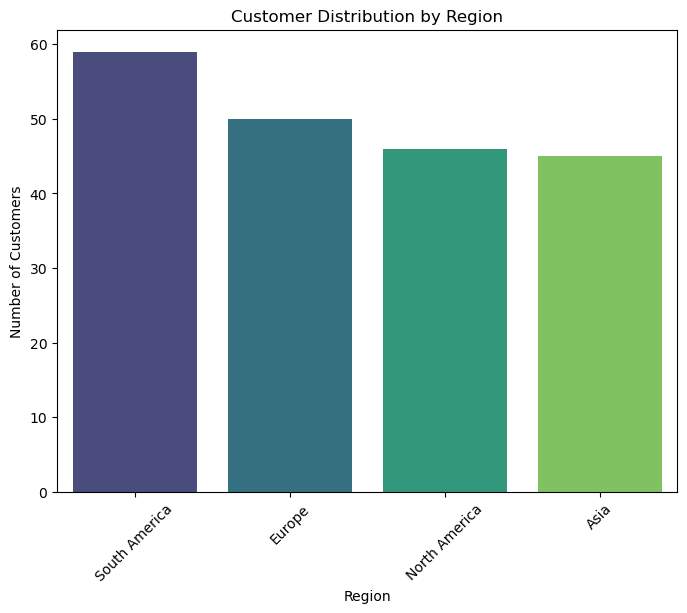

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

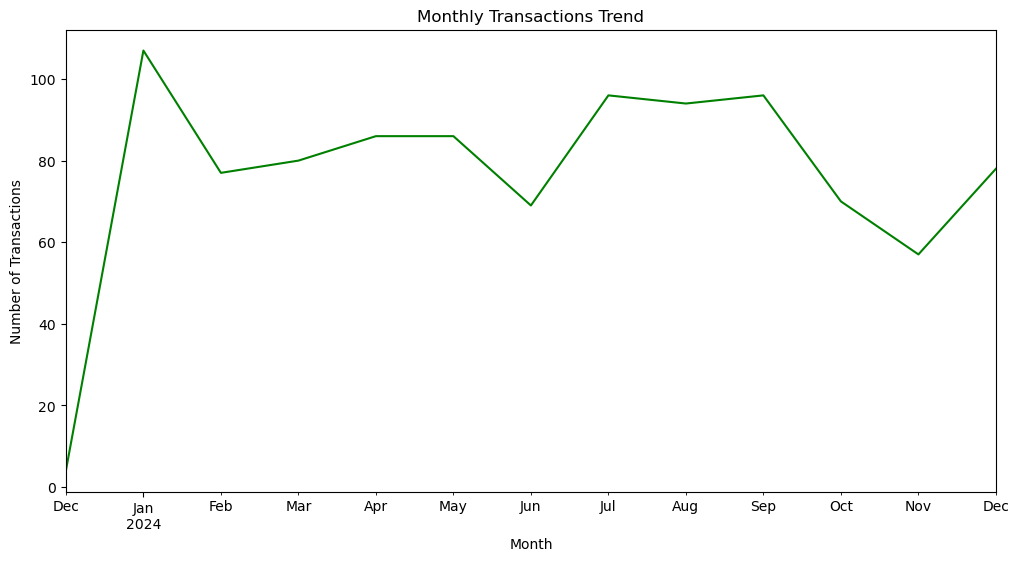

In [25]:
plt.figure(figsize=(12, 6))
monthly_transactions.plot(title='Monthly Transactions Trend', color='green')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

In [26]:
merged_data.to_csv("/mnt/data/MergedDataset.csv", index=False)

OSError: Cannot save file into a non-existent directory: '\mnt\data'

In [27]:
import os

output_directory = r"C:\mnt\data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)


In [28]:
merged_data.to_csv(r"C:\mnt\data\MergedDataset.csv", index=False)

In [30]:
merged_data.to_csv("MergedDataset.csv", index=False)


In [31]:
file_name = "Naresh_Jeedi_EDA.csv"
merged_data.to_csv(file_name, index=False)

In [1]:
import os
print(os.getcwd())

C:\Users\nanin
